# **Milestone 2 - Supervised Learning**
---

# **(1) Introduction** 

Name: Basyira Sabita  
Batch: HCK-012

**Objectives**  
This program aims to build a machine learning model to predict bike rental demand in Seoul. There are five algorithms used as the model: KNN Regressor, SVR, Decision Tree Regressor, and Gradient Boosting Regressor. Each base model will be evaluated using cross-validation and metrics. The initial metrics used include Mean Absolute Error (MAE) to measure the average absolute error of predicted and actual values and R2 score to measure the performance of the model. Following the assessment of base models, hyperparameter tuning will be performed on the best base model to refine it, followed by a comparison with the untuned model. The selection of the best model will be based on a comparison between the base and tuned models

## Case Study 

In the busy streets of Seoul, filled with workers and tourists alike, transportation accommodations pose a challenge. Bicycles have emerged as a popular mode of transport for both locals and visitors. Capitalizing on this trend, bike rental businesses have flourished. In this dataset analysis, we aim to explore bike rental demands throughout the year to identify business opportunities. We will utilize predictive machine learning models, including KNN Regressor, SVR, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor, to predict daily bike rental demand. Evaluation metrics such as MAE and R2 score will be use to assess model performance. The insights derived from these predictions aim to guide business decisions, which fostering a greener, more sustainable future for Seoul's residents and visitors.

# **(2) Import Libraries** 

In [3]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.max_columns = 200
warnings.filterwarnings('ignore')

# Import model libraries
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, pearsonr
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Saving Models
import pickle

# **(3) Data Loading** 

## Load Data

In [4]:
# Load Data
df_raw = pd.read_csv('SeoulBikeData.csv')

# Display first 10 rows
df_raw.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


We can see that we have successfully loaded data into `df_raw`. We can see the first 10 rows of data.

In [5]:
# Display last 10 rows
df_raw.tail(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


And, now the last 10 rows of data.

In [6]:
# Check the Information and Properties of the Data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

Based on the data information, the dataset contains 8,760 rows and 14 columns. Notably, there are 6 columns with the 'float64' data type, 4 columns with the 'int64' data type, and 4 columns with the 'object' data type. While the column names are descriptive, there are several columns that has the unit attached to the column names. To enhance easier accessibility, we need to rename the column names by removing the unit in the respective columns.

## Rename Columns and Convert the Suitable Data Types

In [7]:
# Dict for defining the new column names
new_cols = {
    'Temperature(C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind Speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(C)': 'Dew Point Temperature',
    'Solar Radiation (MJ/m2)': 'Solar Radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall'
}

# Rename the columns with new column names
df_raw = df_raw.rename(columns = new_cols)

df_raw

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


We've now successfully renamed the columns by removing the unit previously attached to the column name.

In [8]:
# Check the Information and Properties of the Data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind Speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew Point Temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

From the data information, it's evident that there is a Date column. However, the data type of the 'Date' column is currently listed as an object. Therefore, we need to convert the data type of this column to datetime[ns].

In [9]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'], format='%d/%m/%Y')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind Speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew Point Temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

As we can see from the information of the data, we observe that the Date column is already coverted into datetime[ns] data type.

## Check Missing Values

In [10]:
# Checking num of missing values in every columns
df_raw.isna().sum().sort_values(ascending=False)

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew Point Temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

We can see that there's no missing value detected in every column.

## Check Duplicated Data

In [11]:
# Checking num of duplicated data in the dataset
df_raw.duplicated().sum()

0

We can see that there's no duplicated data detected in the dataset.

## Describe Data

In [12]:
# Describing the numeric data
df_raw.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,8760,2018-05-31 23:59:59.999999744,2017-12-01 00:00:00,2018-03-02 00:00:00,2018-06-01 00:00:00,2018-08-31 00:00:00,2018-11-30 00:00:00,NaN
Rented Bike Count,8760.0,704.602055,0.0,191.0,504.5,1065.25,3556.0,644.997468
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Temperature,8760.0,12.882922,-17.8,3.5,13.7,22.5,39.4,11.944825
Humidity,8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
Wind Speed,8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
Visibility,8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
Dew Point Temperature,8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.2,13.060369
Solar Radiation,8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
Rainfall,8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193


We observe that several columns exhibit a considerable difference between the mean and the standard deviation, implying a wide range of values in the data. This observation is consistent with the wide range observed in both the minimum and maximum values, indicating the presence of outliers in the dataset.

In [13]:
# Describing the categorical data
df_raw.describe(include='object').T

,count,unique,top,freq
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


We can see that now there's only three categorical columns within the data. Every categorical column has unique value counts below 5, indicating low cardinality.

In [16]:
# Saving the cleaned csv for deployment purposes
df_raw.to_csv('deployment/SeoulBikeDataCleaned.csv', index=False)

# **(4) Exploratory Data Analysis** 

## Columns Distributions 

### Plot Distribution Functions

In [265]:
# Function to plot numeric distribution (histogram & boxplot)
def plot_distribution(col, colName, color):
    plt.figure(figsize=(12,5))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_raw[col], kde=True, color=color, bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_raw, x=col, color=color)
    plt.title('Boxplot')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

In [266]:
# Function to plot categorical distribution (barplot & piechart)
def plot_count(col, colName):
    labels = df_raw[col].value_counts().index.tolist()
    sizes = df_raw[col].value_counts().values.tolist()

    plt.figure(figsize=(12,5))

    # Barplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=labels, y=sizes)
    plt.title('Bar Chart')

    # Piechart
    plt.subplot(1, 2, 2)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Pie Chart')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

### Rented Bike Count Distribution

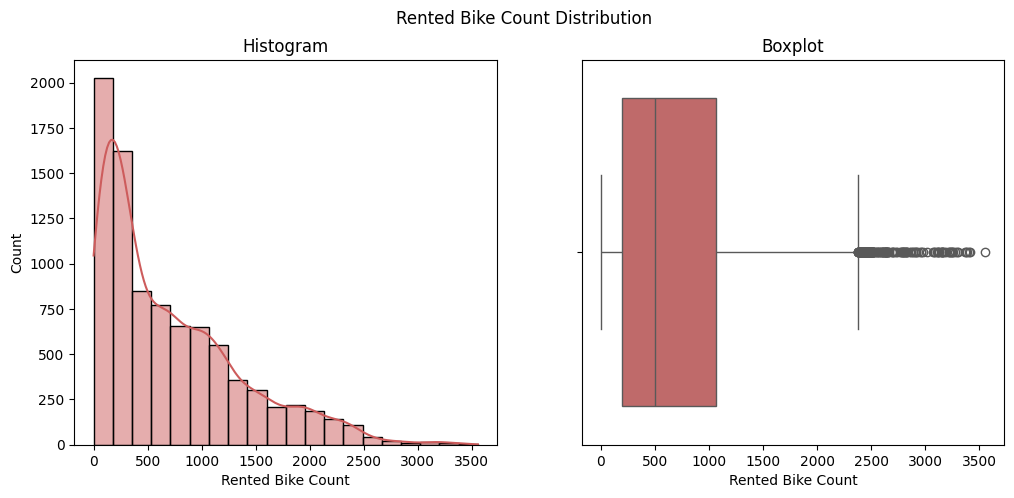

In [267]:
# Display the column distribution
plot_distribution('Rented Bike Count', 'Rented Bike Count', 'indianred')

The `Rented Bike Count` column exhibits a positively skewed distribution, suggesting that the data is skewed to the left. The boxplot reveals numerous outliers in this column, with values exceeding 3500 bike rentals. It is assumed that these outliers occur due to specific events throughout the year, such as public holidays, which would naturally affect bike rental counts, leading to fluctuations. Typically, the bike rental count peaks within the range of 0 to 500 rentals.

### Temperature Distribution

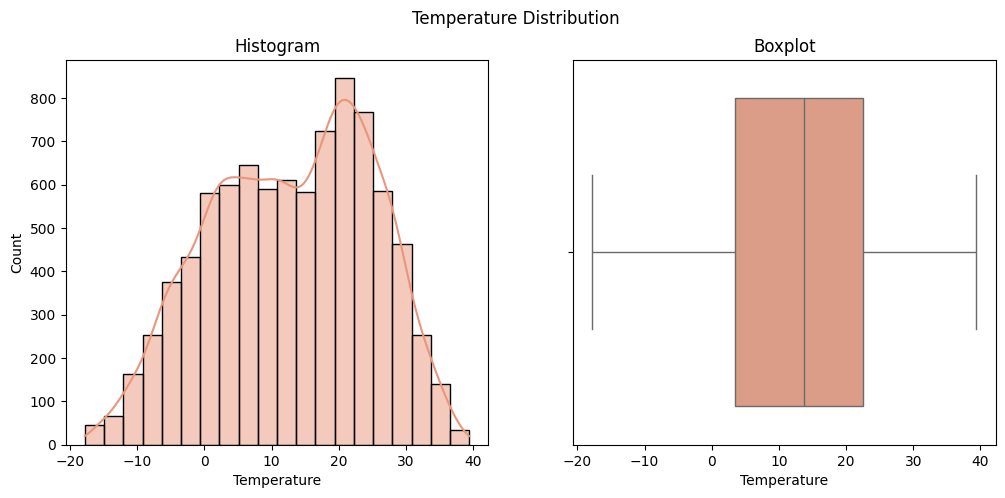

In [268]:
# Display the column distribution
plot_distribution('Temperature', 'Temperature', 'darksalmon')

The `Temperature` column shows a normal distribution, indicating that the mean, median, mode value is similar and the data is pooled around the center. As observed in the boxplot, there are no outliers detected in this column. Moreover, the temperature values range from -20°C to 40°C, covering a wide span. This range indicates that the data encompasses the four seasons.

### Humidity Distribution

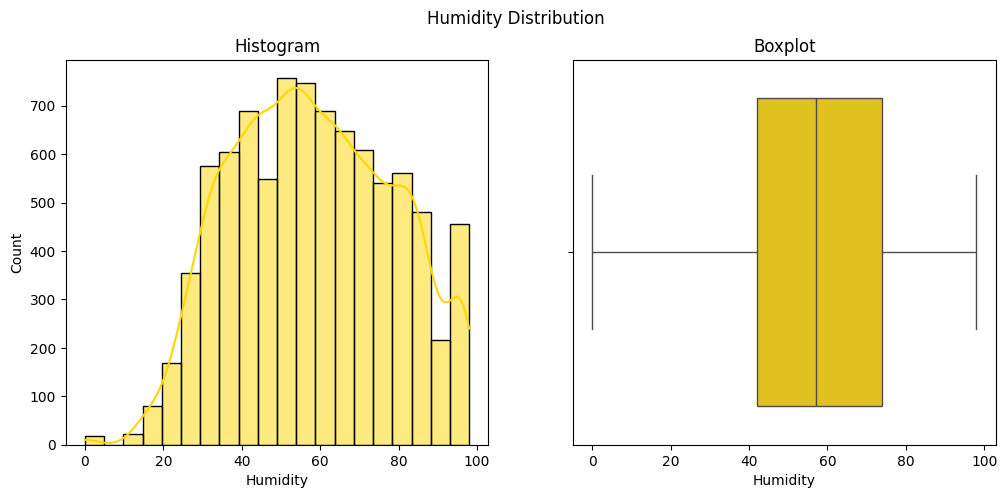

In [269]:
# Display the column distribution
plot_distribution('Humidity', 'Humidity', 'gold')

The `Humidity` column shows a normal distribution, indicating that the mean, median, mode value is similar and the data is pooled around the center but slightly lean to the right. As observed in the boxplot, there are no outliers detected in this column. Moreover, we note that the data values range between 0% and 100%. The peaks of humidity in Seoul throughout the year fall within the range of 40% to 60%, indicating moderate humidity levels in the city.

### Wind Speed Distribution

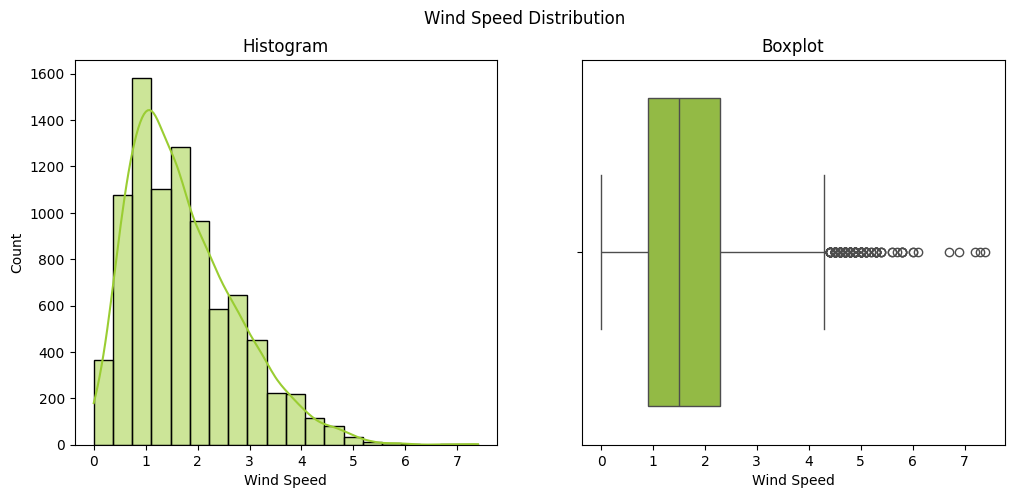

In [270]:
# Display the column distribution
plot_distribution('Wind Speed', 'Wind Speed', 'yellowgreen')

The `Wind Speed` column shows a positive skewness distribution, indicating that the data is skewed towards the left. As observed in the boxplot, there are quite a lot of outliers in this column, with values significantly exceeding 7 m/s. Notably, the peak wind speed in Seoul throughout the year is around 1 m/s which we can infer as light breeze.

### Visibility Distribution

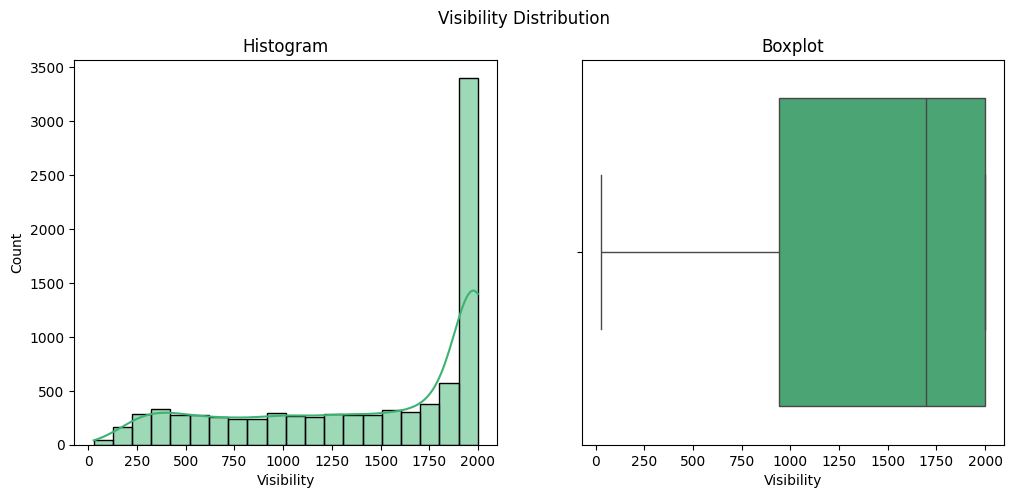

In [271]:
# Display the column distribution
plot_distribution('Visibility', 'Visibility', 'mediumseagreen')

The `Visibility` column shows a negative skewness distribution, indicating that the data is skewed towards the right. As observed in the boxplot, there are no outliers detected in this column, with values ranging from 0 to 20000 m of visibility. The visibility peaks in 20000 m or 20 km which considered as excellent visibility.

### Dew Point Temperature Distribution

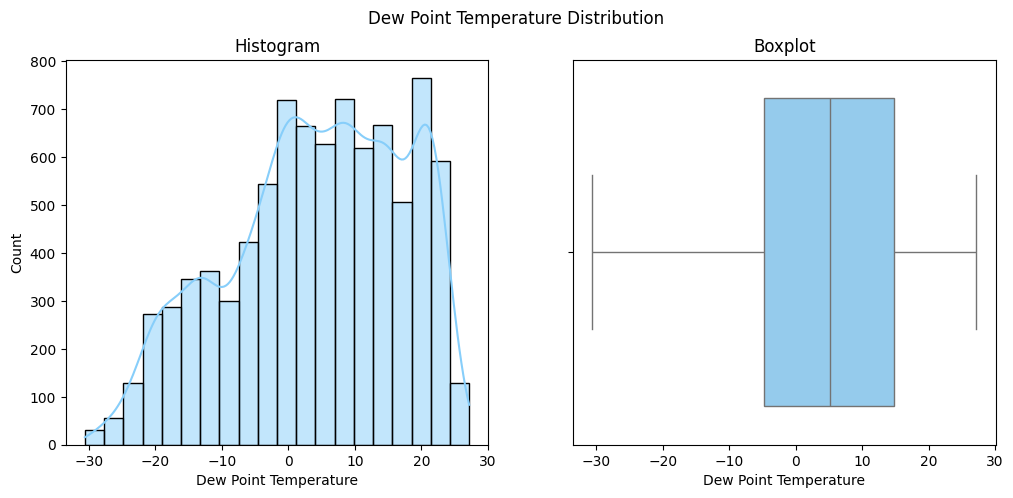

In [272]:
# Display the column distribution
plot_distribution('Dew Point Temperature', 'Dew Point Temperature', 'lightskyblue')

The `Dew Point Temperature` column shows a normal distribution, indicating that the mean, median, mode value is similar and the data is pooled around the center but slightly leans to the right. As observed in the boxplot, there are no outliers detected in this column. Additionally, we observe that the data values range between -30°C and 30°C.

### Solar Radiation Distribution

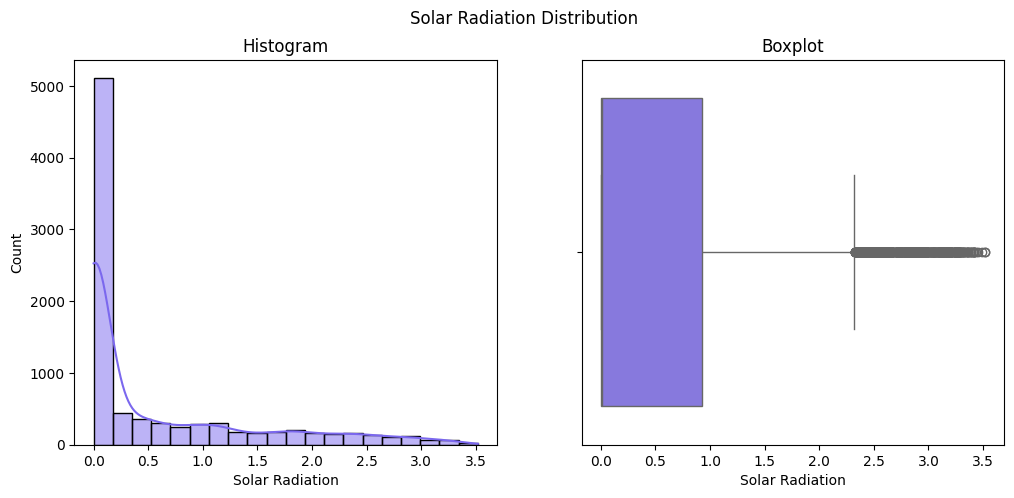

In [273]:
# Display the column distribution
plot_distribution('Solar Radiation', 'Solar Radiation', 'mediumslateblue')

The `Solar Radiation` column shows a high positive skewness distribution, indicating that the data is skewed towards the left. As observed in the boxplot, there are a lot of outliers in this column, with values significantly exceeding 3.5 MJ/m2. Interestingly, solar radiation in Seoul throughout the year peaks at 0, indicating no solar radiation on a daily basis. However, considering that the dataset includes nighttime data as well, this explains why the solar radiation peaks at 0.

### Rainfall Distribution

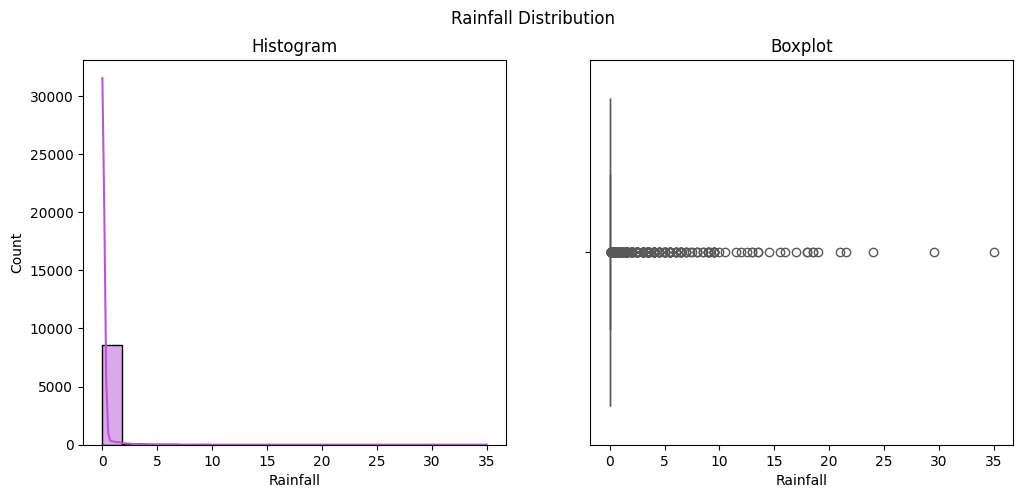

In [274]:
# Display the column distribution
plot_distribution('Rainfall', 'Rainfall', 'mediumorchid')

The `Rainfall` column shows a high positive skewness distribution, indicating that the data is skewed towards the left. As observed in the boxplot, there are numerous outliers in this column, with values significantly reaching 35 mm. Interestingly, rainfall in Seoul is mostly minimal, as indicated by the frequent occurrence of 0 mm data throughout the year. The most precipitation in the dataset period is nearly 35 mm which considered as moderate rain. However, the dataset also captures instances of moderate rainfall, with the highest recorded precipitation being nearly 35 mm.

### Snowfall Distribution

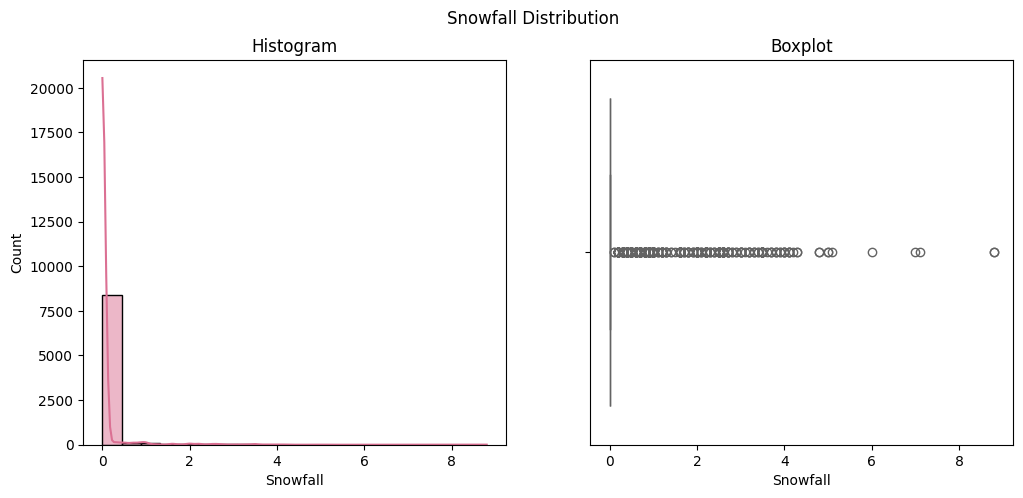

In [275]:
# Display the column distribution
plot_distribution('Snowfall', 'Snowfall', 'palevioletred')

The `Snowfall` column shows a high positive skewness distribution, indicating that the data is skewed towards the left. As observed in the boxplot, there are numerous outliers in this column, with values significantly exceeding 8 cm. The data is predominantly clustered around 0, which aligns with the presence of all four seasons in the dataset, and snowfall typically occurring only during winter.

### Seasons Distribution

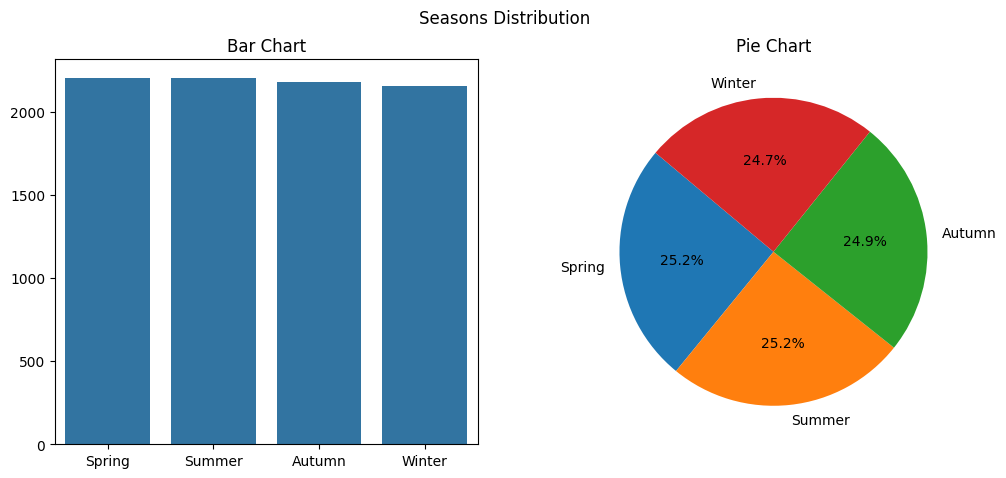

In [276]:
plot_count('Seasons', 'Seasons')

The `Seasons` column contains 4 unique values: Spring, Summer, Autumn, and Winter. Each season accounts for approximately 25% of the data, indicating a balanced proportion. From this visualization, we can infer that the dataset consists of data for a single year (1 cycle of 4 seasons).

### Holiday Distribution

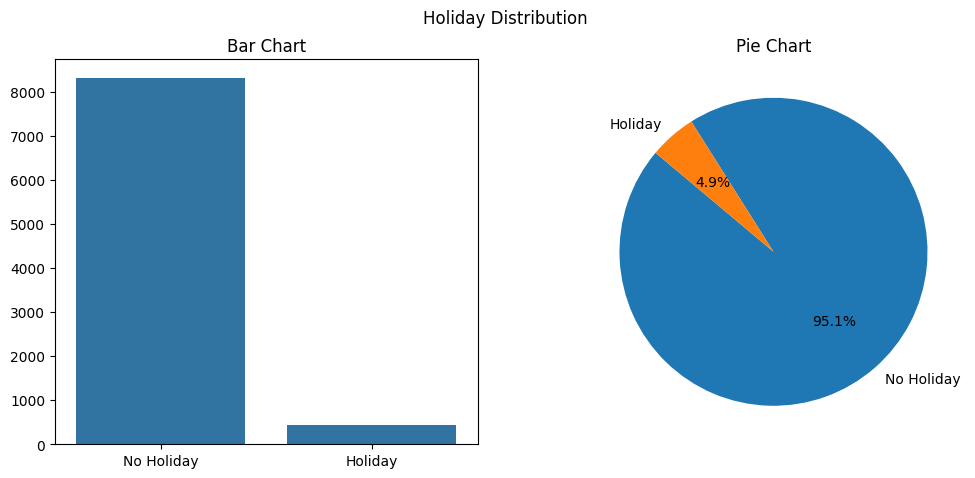

In [277]:
plot_count('Holiday', 'Holiday')

The `Holiday` column contains 2 unique values: Holiday and No Holiday. The percentage of 'No Holiday' values (95.1%) is significantly higher than the percentage of 'Holiday' values (4.9%), indicating an imbalanced proportion. This proportion makes sense as there are typically more non-holiday days in a year.

### Functioning Day Distribution

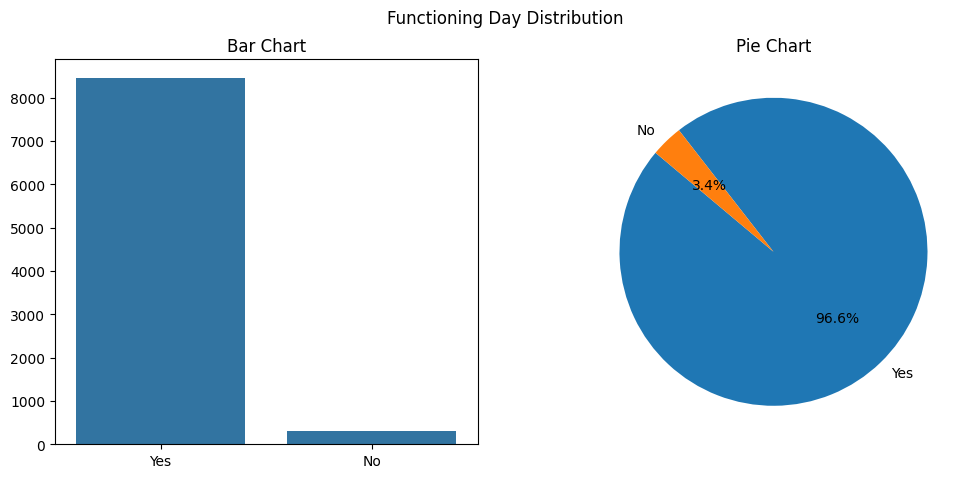

In [278]:
plot_count('Functioning Day', 'Functioning Day')

The `Functioning Day` column contains 2 unique values: Yes and No. The percentage of 'Yes' values (96.6%) is significantly higher than the percentage of 'No' values (3.4%), indicating an imbalanced proportion. This proportion makes sense as there are typically more functioning days in a year.

## Rented Bike Count by Seasons and Months

In [279]:
# Group raw data by Date
rent_bike_date_df = df_raw.groupby('Date').agg({'Rented Bike Count': 'mean', 'Seasons': 'first'}).reset_index()

# Extract month from Date
rent_bike_date_df['Month'] = rent_bike_date_df['Date'].dt.month

# Group data by Month
rent_bike_month_df = rent_bike_date_df.groupby('Month').agg({'Rented Bike Count': 'mean', 'Seasons': 'first'}).reset_index()

rent_bike_month_df

,Month,Rented Bike Count,Seasons
0,1,201.620968,Winter
1,2,225.941964,Winter
2,3,511.551075,Spring
3,4,728.093056,Spring
4,5,950.387097,Spring
5,6,1245.676389,Summer
6,7,987.177419,Summer
7,8,876.192204,Summer
8,9,935.572222,Autumn
9,10,874.563172,Autumn


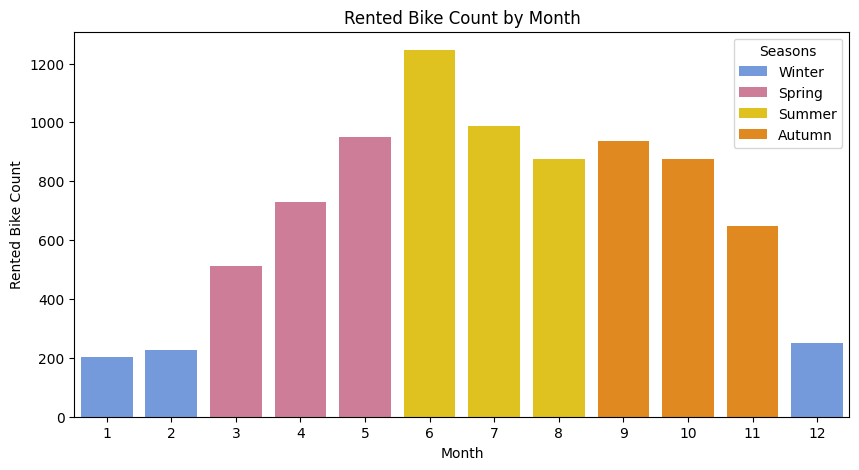

In [280]:
# Declare the figure size
plt.figure(figsize=(10,5))

# Barplot the rented bike count by month
sns.barplot(
    rent_bike_month_df, 
    x = 'Month', 
    y = 'Rented Bike Count',
    hue = 'Seasons',
    palette=['cornflowerblue', 'palevioletred', 'gold', 'darkorange']
)

# Property of Figure
plt.title('Rented Bike Count by Month')
plt.show()

The peak of bike rental demand occurs during Summer (Months 6 to 8). Demand in Spring (Months 3 to 5) and Autumn (Months 9 to 11) is relatively similar. Meanwhile, the lowest bike rental demand is observed in Winter (Months 12 to 2). There is a notable difference between the highest and lowest demand periods. Based on these findings, we can infer a correlation between bike rental demand and temperature. As seen in the visualization, demand decreases as temperatures drop.

## Rented Bike Count by Temperature Levels

In [281]:
# Slicing the Data
rent_bike_temp_df = df_raw[['Rented Bike Count', 'Temperature']]

# Adding temperature category
bins = pd.cut(rent_bike_temp_df['Temperature'], bins=5, labels=['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])
rent_bike_temp_df['Temperature Level'] = bins

# Group by Temperature Level
rent_bike_temp_grouped_df = rent_bike_temp_df.groupby('Temperature Level') \
                            .agg({'Rented Bike Count': 'mean', 'Temperature': 'mean'}).sort_values('Temperature', ascending=False) \
                            .reset_index()

rent_bike_temp_grouped_df

,Temperature Level,Rented Bike Count,Temperature
0,Hot,1133.260382,31.233446
1,Warm,1036.754362,22.030277
2,Moderate,613.922570,10.681878
3,Cold,278.710407,-0.030216
4,Very Cold,164.814745,-9.914178


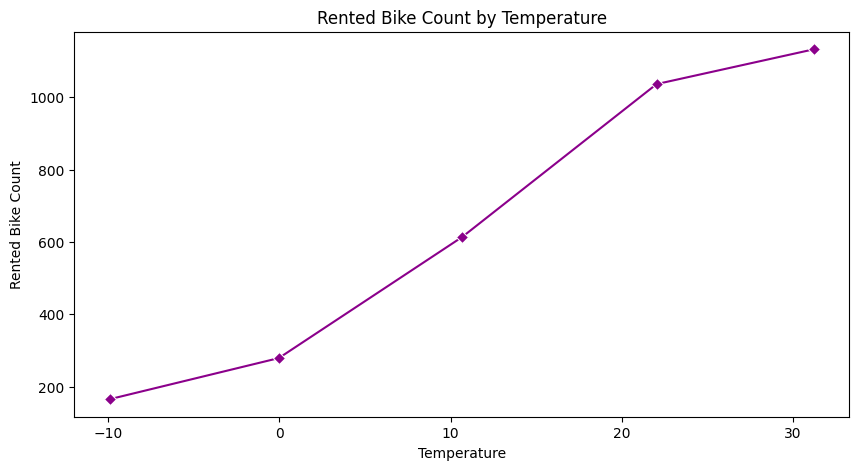

In [282]:
# Declare the figure size
plt.figure(figsize=(10,5))

# Scatterplot the rented bike count by temperature
sns.lineplot(
    rent_bike_temp_grouped_df, 
    x = 'Temperature', 
    y = 'Rented Bike Count',
    color='darkmagenta',
    marker='D'
)

# Property of Figure
plt.title('Rented Bike Count by Temperature')
plt.show()

As previously mentioned, according to this visualization, we can observe an increase in bike rental demand with higher temperatures. The lowest demand is less than 200 rentals, while the highest demand exceeds 1000 rentals. We can also see that there is a significant increase in demand as temperatures transition from cold (approx. 0°C) to warm (approx. 20°C).

## Rented Bike Demand by Weekend or Weekdays

In [283]:
# Slicing raw data
rent_bike_days_hour_df = df_raw[['Date', 'Rented Bike Count', 'Hour']]

is_weekend = []
for date in rent_bike_days_hour_df['Date']:
    dow = date.day_of_week
    if dow >= 5:
        is_weekend.append('Weekend')
    else:
        is_weekend.append('Weekday')

rent_bike_days_hour_df['Days'] = is_weekend

rent_bike_days_hour_df

,Date,Rented Bike Count,Hour,Days
0,2017-12-01,254,0,Weekday
1,2017-12-01,204,1,Weekday
2,2017-12-01,173,2,Weekday
3,2017-12-01,107,3,Weekday
4,2017-12-01,78,4,Weekday
...,...,...,...,...
8755,2018-11-30,1003,19,Weekday
8756,2018-11-30,764,20,Weekday
8757,2018-11-30,694,21,Weekday
8758,2018-11-30,712,22,Weekday


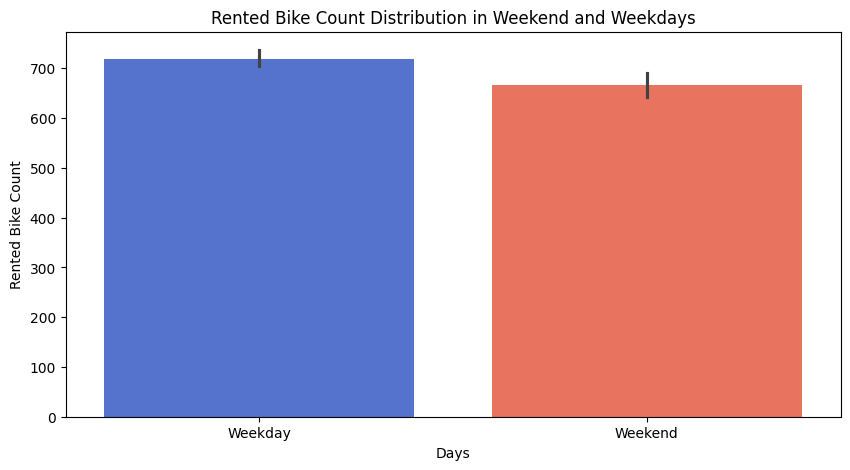

In [284]:
# Declare the figure size
plt.figure(figsize=(10,5))

# Barplot the rented bike count by month
sns.barplot(
    rent_bike_days_hour_df, 
    x = 'Days', 
    y = 'Rented Bike Count',
    palette = ['royalblue', 'tomato']
)

# Property of Figure
plt.title('Rented Bike Count Distribution in Weekend and Weekdays')
plt.show()

According to the visualization, bike rental demand is higher on weekdays than weekends. Based on domain knowledge, we infer that weekday demand is elevated due to bike usage for commuting to and from work. Meanwhile, in weekends we see lower demand as bikes are more commonly used for recreational purposes. Surprisingly, the observed difference in bike rental counts between weekdays and weekends is not that extensive, indicating that demand for recreational purposes may also be significant, contributing to overall rental demand.

## Rented Bike Count by Hour

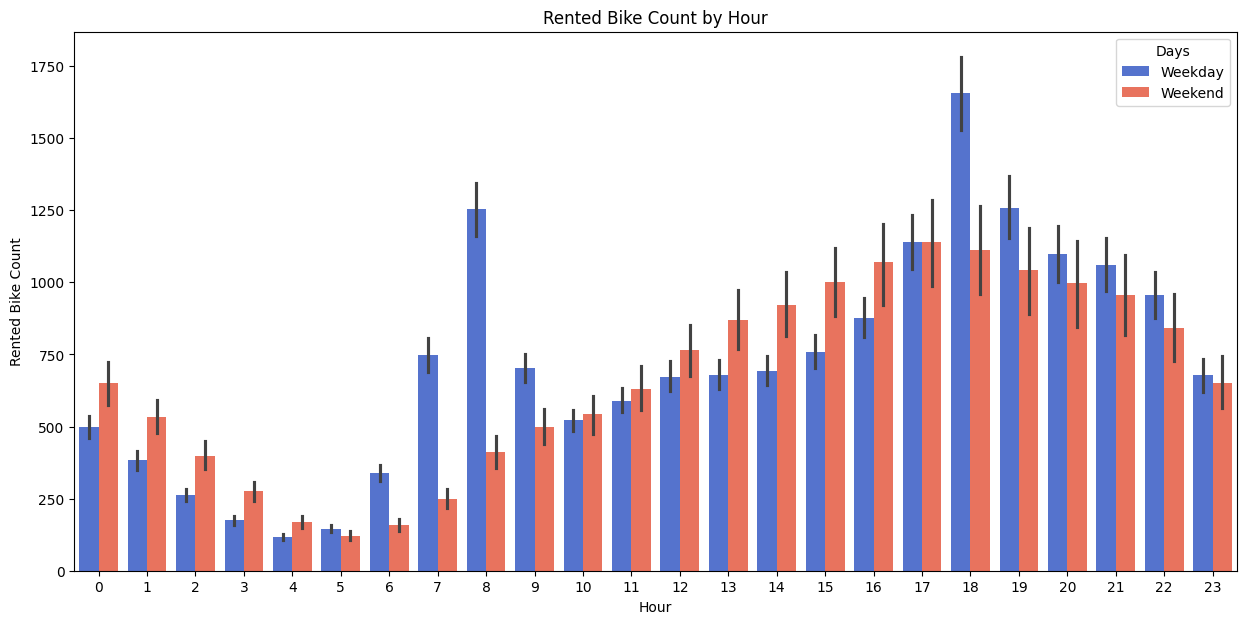

In [285]:
# Declare the figure size
plt.figure(figsize=(15,7))

# Barplot the rented bike count by month
sns.barplot(
    rent_bike_days_hour_df, 
    x = 'Hour', 
    y = 'Rented Bike Count',
    hue = 'Days',
    palette=['royalblue', 'tomato']
)

# Property of Figure
plt.title('Rented Bike Count by Hour')
plt.show()

After plotting the demand distribution on weekdays and weekends, we can now analyze the distribution by hour. We observe that bike rentals peak at 8 AM and 6 PM, aligning with rush hours, backing up the assumption of people rent a bike on weekdays for commuting purposes. Weekday demand rises from 4 AM to 8 AM, drops significantly thereafter, then increases again from 10 AM, reaching its peak at 6 PM. After 6 PM, the demand declines until 4 AM. Surprisingly, demand remains unexpectedly high in the evenings and after midnight on weekdays. On weekends, demand steadily increases from 5 AM, reaching its peak at 5 PM, then gradually decreases until 5 AM.

## Correlation of Rented Bike Count and Weather Condition Features

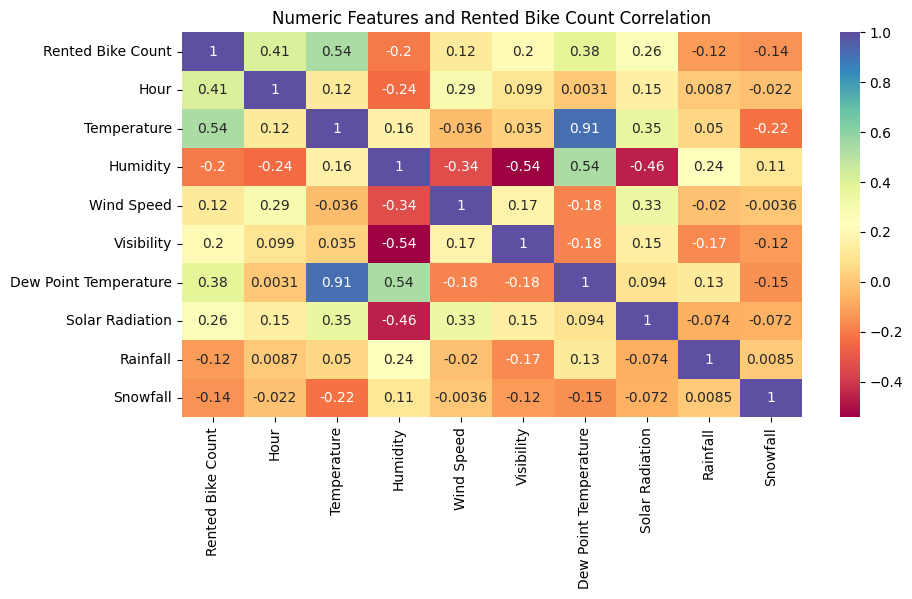

In [286]:
# Defining all the numeric columns in data
num_cols_raw = df_raw.select_dtypes(include=np.number).columns.to_list()

# Heatmap to plot the Numeric Features and Rented Bike Count Correlation
plt.figure(figsize=(10, 5))
sns.heatmap(df_raw[num_cols_raw].corr(), cmap="Spectral", annot=True) 
plt.title('Numeric Features and Rented Bike Count Correlation')
plt.show()

From the heatmap, we can see that every numeric columns in the data has a relatively good correlation with the Rented Bike Count target. There are 6 columns that has a positive correlation and 3 columns with negative correlation. Correlation method used in this heatmap is the pearson r correlation because we want to see the linear relationship of the columns.

# **(5) Feature Engineering** 

## Copy the Data

In [287]:
# Copying the Data
df = df_raw.copy()

df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


We've successfully copied the data to the `df` variable.

## Handle Cardinality

In [288]:
# Defining all the categorical columns in data
cat_cols = list(df.select_dtypes(include='object').columns)

# For every categorical column
# check the number of unique values
cardinality_list = []
for col in cat_cols:
  cardinality_list.append([col, df[col].nunique()])

pd.DataFrame(columns=['Column Name', 'Num of Unique Values',], data=cardinality_list)

,Column Name,Num of Unique Values
0,Seasons,4
1,Holiday,2
2,Functioning Day,2


As we can see from the table, the number of unique values in each column falls below 5, indicating low cardinality. Therefore, we don't need to handle the cardinality.

## Split X (Features) and y (target)

In [289]:
# Splitting between X and y
X = df.drop(['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
X.head()

X shape: (8760, 13)
y shape: (8760,)


,Date,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


We've successfully split the data into X (Features) and y (target).

## Split Train and Test set

In [290]:
# Splitting between Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (7008, 13)
X test shape: (1752, 13)
y train shape: (7008,)
y test shape: (1752,)


We've successfully split the data into train and test set.

## Handling Outliers

In [291]:
# Define numeric columns
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

num_skewed_vals = []
skewed_cols = []

num_normal_vals = []
normal_cols = []

# For every numeric column
# Check the skewness value and determine whether
# the distribution skewed or normal
for col in num_cols:
    skew = X_train[col].skew()
    # Normal Distribution
    if skew <= 0.5 and skew >= -0.5:
        normal_cols.append(col)
        num_normal_vals.append([col, skew])
    # Skewed Distribution
    elif skew < -0.5 or skew > 0.5:
        skewed_cols.append(col)
        num_skewed_vals.append([col, skew])

# Display Columns with Skewed Distribution
print('Columns with Skewed Distribution')
pd.DataFrame(data=num_skewed_vals, columns=['Column Name', 'Skewness'])

Columns with Skewed Distribution


,Column Name,Skewness
0,Wind Speed,0.878441
1,Visibility,-0.683717
2,Solar Radiation,1.508684
3,Rainfall,14.631225
4,Snowfall,8.714620


We observe that 5 columns exhibit a skewed distribution: `Wind Speed`, `Visibility`, `Solar Radiation`, `Rainfall`, and `Snowfall`. Outliers in each of these columns with skewed distributions will be addressed using the Winsorizer module using the IQR method. However, based on our previous EDA, we have noted that the `Rainfall` and `Snowfall` columns have low variation and may actually follow a normal distribution. Therefore, these two columns will be handled by the Winsorizer module using the Gaussian method.

In [292]:
# Display Columns with Normal Distribution
print('Columns with Normal Distribution')
pd.DataFrame(data=num_normal_vals, columns=['Column Name', 'Skewness'])

Columns with Normal Distribution


,Column Name,Skewness
0,Hour,0.000163
1,Temperature,-0.191979
2,Humidity,0.060053
3,Dew Point Temperature,-0.365670


We observe that 5 columns exhibit a skewed distribution: `Hour`, `Temperature`, `Humidity`, and `Dew Point Temperature`. Outliers in each of these columns with normal distributions will be addressed using the Winsorizer module using the Gaussian method. 

In [293]:
# Define the skewed distribution but low variance columns
skew_low_vars = ['Rainfall', 'Snowfall']

# For every skewed distribution but low variance column
for skew_low in skew_low_vars:
    print(skew_low, end=' ')
    normal_cols.append(skew_low) # Adding to columns that will be handled using Gaussian Method
    skewed_cols.remove(skew_low) # Removing from columns that will be handled using IQR Method

Rainfall Snowfall 

We've successfully move the `Rainfall` and `Snowfall` columns into columns that will be handled using the Gaussian Method.

In [294]:
# Winsorizer declaration to handle the skewed data distribution
winsoriserIqr = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skewed_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserIqr.fit_transform(X_train)
X_test_capped = winsoriserIqr.transform(X_test)

In [295]:
# Winsorizer declaration to handle the normal data distribution
winsoriserNormal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserNormal.fit_transform(X_train_capped)
X_test_capped = winsoriserNormal.transform(X_test_capped)

We've successfully capped the data using the Winsorizer module, using respective method based on the distribution of the columns.

In [296]:
# Check the Skewness of the capped numeric columns in X_train
X_train_capped[num_cols].skew()

Hour                     0.000163
Temperature             -0.191979
Humidity                 0.060053
Wind Speed               0.709906
Visibility              -0.683717
Dew Point Temperature   -0.365670
Solar Radiation          1.273280
Rainfall                 6.081119
Snowfall                 5.077648
dtype: float64

We observe that majority of the skewness value in each column is now approaching a normal distribution. Thus, we can assume that the columns now follow a normal distribution.

## Handling Missing Values

In [297]:
# Checking num of missing values in every columns in X_train
X_train_capped.isna().sum().sort_values(ascending=False)

Date                     0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew Point Temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

There are no missing values detected in any of the columns. So, we don't need to handle them.

## Feature Selection

### Splitting between Numeric and Categorical Columns

In [298]:
# Splitting between Numeric and Categorical Column Names
num_cols = X_train_capped.select_dtypes(include = np.number).columns.tolist()
cat_cols = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print(f'Numeric ({len(num_cols)}):\n{num_cols}')
print()
print(f'Categorical ({len(cat_cols)}):\n{cat_cols}')

Numeric (9):
['Hour', 'Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']

Categorical (3):
['Seasons', 'Holiday', 'Functioning Day']


We've successfully define the numeric and categorical columns. Now, we need to split the train and test set by numeric and categorical columns.

In [299]:
# Splitting between Numeric and Categorical Columns
X_train_num = X_train_capped[num_cols]
X_train_cat = X_train_capped[cat_cols]

X_test_num = X_test_capped[num_cols]
X_test_cat = X_test_capped[cat_cols]

X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 1799 to 3582
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour                   7008 non-null   int64  
 1   Temperature            7008 non-null   float64
 2   Humidity               7008 non-null   int64  
 3   Wind Speed             7008 non-null   float64
 4   Visibility             7008 non-null   int64  
 5   Dew Point Temperature  7008 non-null   float64
 6   Solar Radiation        7008 non-null   float64
 7   Rainfall               7008 non-null   float64
 8   Snowfall               7008 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 547.5 KB


We've successfully split the train and test set by the types of the features (numeric and categorical).

### Correlation between Rented Bike Count and X_Train Numeric Columns

In [300]:
# Correlation between Rented Bike Count and X_Train Numeric Columns
stats = []
p_values = []
interprets = []
selected_num = []
not_selected_num = []

# Loop every column in numerical continous columns
for col in num_cols:
    statistic, pvalue = pearsonr(X_train[col], y_train)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_num.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_num.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': num_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,Hour,0.413765,4.890617e-288,Correlated
1,Temperature,0.540000,0.000000e+00,Correlated
2,Humidity,-0.209254,3.465906e-70,Correlated
3,Wind Speed,0.136913,1.125328e-30,Correlated
4,Visibility,0.204911,2.557789e-67,Correlated
5,Dew Point Temperature,0.377973,7.493679e-237,Correlated
6,Solar Radiation,0.266721,1.914481e-114,Correlated
7,Rainfall,-0.121231,2.326994e-24,Correlated
8,Snowfall,-0.140001,5.194420e-32,Correlated


As we can see from the table, every numeric features are correlated with the target (Rented Bike Count). Therefore, we will select all of the numeric columns. In this selection, we use pearson r correlation because we want to see the linear relationship between the numeric features and the target.

### Correlation between Rented Bike Count and X_Train Categorical Features

In [301]:
# Correlation between default payment next month and X_train categorical features
stats = []
p_values = []
interprets = []
selected_cat = []
not_selected_cat = []

# Loop every column in categorical columns
for col in cat_cols:
    statistic, pvalue = kendalltau(X_train[col], y_train)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_cat.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_cat.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': cat_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,Seasons,-0.208479,5.189604e-121,Correlated
1,Holiday,0.072033,1.603629e-13,Correlated
2,Functioning Day,0.251664,1.585182e-146,Correlated


As we can see from the table, every categorical features are also correlated with the target (Rented Bike Count). Therefore, we will select all of the categorical columns. In this selection, we use kendall tau correlation because we want to see the relationship between the categorical features and the target without relying on linearity as it makes more sense in a categorical characteristics.

### Final Features

In [302]:
# Drop Columns that are not selected
selected_final =  selected_num + selected_cat

print(f'Drop columns: {not_selected_cat + not_selected_num}')
X_train_final = X_train[selected_final]
X_test_final = X_test[selected_final]

display(X_train_final.head())
X_test_final.head()

Drop columns: []


,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
1799,23,2.4,59,3.2,2000,-4.8,0.00,0.0,0.0,Winter,No Holiday,Yes
7458,18,17.9,29,2.8,2000,-0.4,0.16,0.0,0.0,Autumn,No Holiday,Yes
1988,20,-1.1,43,1.5,2000,-12.1,0.00,0.0,0.0,Winter,No Holiday,Yes
785,17,0.3,27,2.6,2000,-16.5,0.18,0.0,0.0,Winter,No Holiday,Yes
2975,23,15.0,94,1.6,163,14.0,0.00,0.0,0.0,Spring,No Holiday,Yes


,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
3771,3,14.7,82,0.8,1822,11.6,0.00,0.0,0.0,Spring,No Holiday,Yes
2680,16,10.3,34,3.8,1850,-4.9,1.93,0.0,0.0,Spring,No Holiday,Yes
4280,8,19.5,50,0.7,1329,8.7,1.19,0.0,0.0,Spring,No Holiday,Yes
1409,17,-3.8,32,5.2,2000,-18.1,0.25,0.0,0.0,Winter,No Holiday,Yes
340,4,-7.1,59,0.8,1058,-13.7,0.00,0.0,0.0,Winter,No Holiday,Yes


We've successfully defined the X train and X test final. Following this selection, they will undergo scaling and encoding processes.

## Scalling

In [303]:
# Checking the skew values in each column
X_train_num.skew()

Hour                     0.000163
Temperature             -0.191979
Humidity                 0.060053
Wind Speed               0.709906
Visibility              -0.683717
Dew Point Temperature   -0.365670
Solar Radiation          1.273280
Rainfall                 6.081119
Snowfall                 5.077648
dtype: float64

As stated before, we can assume that the columns now follow a normal distribution. Therefore, we can use Standard Scaler as our scaler.

In [304]:
# Defining Scaler
scaler = StandardScaler()

scaler

StandardScaler()

We've successfully defined the scaler model using Standard Scaler.

## Encoding

In [305]:
# Get num of unique values
X_train_cat.nunique()

Seasons            4
Holiday            2
Functioning Day    2
dtype: int64

As stated earlier, we know that the data has a low cardinality. Therefore, we don't need to handle this.

In [306]:
# Encoding with One-Hot Encoder
encoder = OneHotEncoder()

encoder

OneHotEncoder()

We've successfully defined the endcoder model using One-Hot Encoder.

## Column Transformer

In [307]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('winsoriserIqr', winsoriserIqr, skewed_cols),
    ('winsoriserNormal', winsoriserNormal, normal_cols),
    ('scaler', scaler, selected_num),
    ('encoder', encoder, selected_cat),
], remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('winsoriserIqr',
                                 Winsorizer(capping_method='iqr', fold=1.5,
                                            missing_values='ignore',
                                            tail='both',
                                            variables=['Wind Speed',
                                                       'Visibility',
                                                       'Solar Radiation']),
                                 ['Wind Speed', 'Visibility',
                                  'Solar Radiation']),
                                ('winsoriserNormal',
                                 Winsorizer(missing_values='ignore',
                                            tail='both',
                                            variables=['Hour', 'Temperature',
                                                       'Humidity',
                                                       'Dew Point Temperature',
                                                       'Rainfall',
                                                       'Snowfall']),
                                 ['Hour', 'Temperature', 'Humidity',
                                  'Dew Point Temperature', 'Rainfall',
                                  'Snowfall']),
                                ('scaler', StandardScaler(),
                                 ['Hour', 'Temperature', 'Humidity',
                                  'Wind Speed', 'Visibility',
                                  'Dew Point Temperature', 'Solar Radiation',
                                  'Rainfall', 'Snowfall']),
                                ('encoder', OneHotEncoder(),
                                 ['Seasons', 'Holiday', 'Functioning Day'])])

We've successfully defined the preprocessing pipeline. 

# **(6) Model Definition** 

## Base Model Definition

### KNN Regressor

In [308]:
# Defining the model
knn_reg = KNeighborsRegressor()

# Defining the pipeline model
knn_reg_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_reg', knn_reg)
])

knn_reg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('knn_reg', KNeighborsRegressor())])

We've successfully defined the KNN Regressor pipeline which consists of the preprocessing column transformer and the respective model.

### SVR

In [309]:
# Defining the model
svr = SVR()

# Defining the pipeline model
svr_pipe = Pipeline([
    ('transformer', transformer),
    ('svr', svr)
])

svr_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Temperature',
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('svr', SVR())])

We've successfully defined the SVR pipeline which consists of the preprocessing column transformer and the respective model.

### Decision Tree Regressor

In [310]:
# Defining the model
dt_reg = DecisionTreeRegressor()

# Defining the pipeline model
dt_reg_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_reg', dt_reg)
])

dt_reg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('dt_reg', DecisionTreeRegressor())])

We've successfully defined the Decision Tree Regressor pipeline which consists of the preprocessing column transformer and the respective model.

### Random Forest Regressor

In [311]:
# Defining the model
rf_reg = RandomForestRegressor()

# Defining the pipeline model
rf_reg_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_reg', rf_reg)
])

rf_reg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('rf_reg', RandomForestRegressor())])

We've successfully defined the Random Forest Regressor pipeline which consists of the preprocessing column transformer and the respective model.

### Gradient Boosting Regressor

In [312]:
# Defining the model
gbm_reg = GradientBoostingRegressor()

# Defining the pipeline model
gbm_reg_pipe = Pipeline([
    ('transformer', transformer),
    ('gbm_reg', gbm_reg)
])

gbm_reg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('gbm_reg', GradientBoostingRegressor())])

We've successfully defined the Gradient Boosting Regressor pipeline which consists of the preprocessing column transformer and the respective model.

## Metrics 

- **Mean Absolute Error (MAE)**:  
Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values, making it easier to interpret. In cases where outliers occur due to certain events throughout the year, penalizing them may not be necessary. Instead, the focus is often on capturing the general pattern of the demand trend. Therefore, using MAE allows for a balanced assessment of model performance, providing insight into the overall predictive capabilities without being overly influenced by outliers.

- **R2 Score**:  
The R2 score measures how well the regression model performance in predicting from the observed data. It provides an indication of the proportion of variance in the dependent variable that is explained by the independent variables included in the model. 

# **(7) Model Training** 

## Base Model Fitting

### KNN Regressor

In [313]:
# Modelling with the base model
knn_reg_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('knn_reg', KNeighborsRegressor())])

We've successfully fitted the KNN Regressor model.

### SVR

In [314]:
# Modelling with the base model
svr_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Temperature',
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('svr', SVR())])

We've successfully fitted the SVR model.

### Decision Tree Regressor

In [315]:
# Modelling with the base model
dt_reg_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('dt_reg', DecisionTreeRegressor())])

We've successfully fitted the Decision Tree Regressor model.

### Random Forest Regressor

In [316]:
# Modelling with the base model
rf_reg_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Rainfall',
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('rf_reg', RandomForestRegressor())])

We've successfully fitted the Random Forest Regressor model.

### Gradient Boosting Regressor

In [317]:
# Modelling with the base model
gbm_reg_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Wind '
                                                                        'Speed',
                                                                        'Visibility',
                                                                        'Solar '
                                                                        'Radiation']),
                                                  ['Wind Speed', 'Visibility',
                                                   'Solar Radiation']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both...
                                                                        'Snowfall']),
                                                  ['Hour', 'Temperature',
                                                   'Humidity',
                                                   'Dew Point Temperature',
                                                   'Rainfall', 'Snowfall']),
                                                 ('scaler', StandardScaler(),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'Wind Speed',
                                                   'Visibility',
                                                   'Dew Point Temperature',
                                                   'Solar Radiation',
                                                   'Rainfall', 'Snowfall']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning Day'])])),
                ('gbm_reg', GradientBoostingRegressor())])

We've successfully fitted the Gradient Boosting Regressor model.

# **(8) Model Evaluation** 

## Evaluation Functions

In [318]:
# Function to display the train and test score from the corresponding model
def train_test_score(modelName, model, isTuned = False):
    if isTuned == False:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print('Tuned Model Score')
        # Best hyperparameters for svc
        best_params_knn = model.best_params_
        print(f'Best params for {modelName}: {best_params_knn}')
        
    train_score = round(model.score(X_train_final, y_train),4)
    test_score = round(model.score(X_test_final, y_test),4)
    print('Training Score: ', train_score)
    print('Testing Score: ', test_score)

In [319]:
# Function to display the metrics score from the corresponding model
def metrics_score(modelName, y_pred_train, y_pred_test, isTuned = False):
    if isTuned == False:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    # Model evaluation using different metrics
    # print('Mean Absolute Error (MAE)')
    # print('Train Set:', mean_absolute_error(y_train, y_pred_train))
    # print('Test Set:', mean_absolute_error(y_test, y_pred_test), '\n')
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    # rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print('Mean Absolute Error (MAE)')
    print('Train Set:', mae_train)
    print('Test Set:', mae_test, '\n')

    # print('Root Mean Squared Error (RMSE)')
    # print('Train Set:', rmse_train)
    # print('Test Set:', rmse_test, '\n')

    print('R2 Score (R2)')
    print('Train Set:', r2_train)
    print('Test Set:', r2_test)

    return mae_train, mae_test, r2_train, r2_test

In [320]:
# Function to display the cross validation score from the corresponding model
def cross_validation_score(modelName, model, isTuned = False):
    if isTuned == False:
        print(f'{modelName} Base Model Cross Validation Score')
    else:
        print(f'{modelName} Tuned Model Cross Validation Score')
    print()

    # Perform cross-validation
    cv_scores_mae = -cross_val_score(model, X_train_final, y_train, scoring='neg_mean_absolute_error', cv=5)
    # cv_scores_rmse = np.sqrt(-cross_val_score(model, X_train_final, y_train, scoring='neg_mean_squared_error', cv=5))
    cv_scores_r2 = cross_val_score(model, X_train_final, y_train, scoring='r2', cv=5)

    # Display the results
    print('MAE')
    print(f'MAE - All - Cross Validation: {cv_scores_mae}')
    print(f'MAE - Mean - Cross Validation: {cv_scores_mae.mean()}')
    print(f'MAE - Std - Cross Validation: {cv_scores_mae.std()}')

    # print('RMSE')
    # print(f'RMSE - All - Cross Validation: {cv_scores_rmse}')
    # print(f'RMSE - Mean - Cross Validation: {cv_scores_rmse.mean()}')
    # print(f'RMSE - Std - Cross Validation: {cv_scores_rmse.std()}')

    print('\nR2 Score')
    print(f'R2 Score - All - Cross Validation: {cv_scores_r2}')
    print(f'R2 Score - Mean - Cross Validation: {cv_scores_r2.mean()}')
    print(f'R2 Score - Std - Cross Validation: {cv_scores_r2.std()}')

## Base Model Evaluation

### KNN Regressor

In [321]:
# Displaying the train and test score for base model
train_test_score('KNN Regressor', knn_reg_pipe)

KNN Regressor Base Model Score
Training Score:  0.7046
Testing Score:  0.5377


The train set score obtained from the KNN Regressor model is 70%. Meanwhile, the test set score obtained is 53%. Based on the scores of the train and test sets, it appears that the model is overfitting, as seen in the significant difference between the train and test set scores, approximately 16%. This suggests that the model has learned the train set patterns too well, resulting in poor predictions on the test set

In [322]:
# Predict using base model
y_knn_reg_train_pred = knn_reg_pipe.predict(X_train_final)
y_knn_reg_test_pred = knn_reg_pipe.predict(X_test_final)

# Displaying the metrics
knn_reg_mae_train, knn_reg_mae_test, knn_reg_r2_train, knn_reg_r2_test = metrics_score('KNN Regressor', y_knn_reg_train_pred, y_knn_reg_test_pred)

KNN Regressor Base Model Score

Mean Absolute Error (MAE)
Train Set: 237.7064783105023
Test Set: 296.4255707762557 

R2 Score (R2)
Train Set: 0.7045770768487932
Test Set: 0.5377394291399235


The MAE value obtained from the train set is approximately 238 bike rental demand. Meanwhile, for the test set it is approximately 296 bike rental demand. It is evident that the MAE value for the train set is lower than that of the test set, indicating overfitting or inconsistency of the model. Moreover, both MAE values are still quite high, implying significant losses due to a large prediction errors. Hence, there is a need to reduce the MAE values further to minimize losses.

In [323]:
# Displaying cross validation score
cross_validation_score('KNN Regressor', knn_reg_pipe)

KNN Regressor Base Model Cross Validation Score



MAE
MAE - All - Cross Validation: [315.06447932 300.17403709 284.50014265 305.83297645 296.56102784]
MAE - Mean - Cross Validation: 300.4265326682286
MAE - Std - Cross Validation: 10.120819105965825

R2 Score
R2 Score - All - Cross Validation: [0.48934022 0.55729023 0.57395283 0.52427392 0.55904699]
R2 Score - Mean - Cross Validation: 0.5407808385601536
R2 Score - Std - Cross Validation: 0.030414499830364743


The average MAE value from Cross Validation is 300 bike rental demands, indicating that the models are off by approximately 300 bikes in predicting demand. Additionally, it can be seen from the high standard deviation value of the MAE that the results per fold are not consistent, indicating that the model's predictions are not reliable. Furthermore, the average R2 score from cross-validation is approximately 54%, indicating the model's accuracy in predicting is still poor. The R2 score results indicate that the model's performance is relatively stable, as evidenced by the standard deviation approaching 0. A standard deviation approaching 0 means that all tested folds have consistent model performance.

### SVR 

In [324]:
# Displaying the train and test score for base model
train_test_score('SVR', svr_pipe)

SVR Base Model Score
Training Score:  -0.0428
Testing Score:  -0.0438


Both train and test set score obtained from the SVR model is approximately -4%, indicating that the model is underfitting. The negative score indicates the algorithm cannot detect the underlying pattern of the data, resulting in inaccurate predictions and poor performance. Therefore, this model is likely unsuitable for use with this dataset.

In [325]:
# Predict using base model
y_svr_train_pred = svr_pipe.predict(X_train_final)
y_svr_test_pred = svr_pipe.predict(X_test_final)

# Displaying the metrics
svr_mae_train, svr_mae_test, svr_r2_train, svr_r2_test = metrics_score('SVR', y_svr_train_pred, y_svr_test_pred)

SVR Base Model Score

Mean Absolute Error (MAE)
Train Set: 488.99193728215977
Test Set: 488.56437301014506 

R2 Score (R2)
Train Set: -0.04284105114770753
Test Set: -0.043769604207980484


The MAE value obtained from the train and test set is approximately 489 bike rental demand. MAE values are considered very high, implying significant losses due to a large prediction errors. Hence, there is a need to reduce the MAE values further to minimize losses. Also, as previously stated, the R2 score obtained from the train and test set is below zero, clearly suggesting that the model is underfitting.

In [326]:
# Displaying cross validation score
cross_validation_score('SVR', svr_pipe)

SVR Base Model Cross Validation Score

MAE
MAE - All - Cross Validation: [485.9017284  493.87913524 489.03951582 493.48854634 487.32939158]
MAE - Mean - Cross Validation: 489.92766347385543
MAE - Std - Cross Validation: 3.226204959144679

R2 Score
R2 Score - All - Cross Validation: [-0.05285228 -0.0438572  -0.05089833 -0.04694705 -0.03925066]
R2 Score - Mean - Cross Validation: -0.04676110306463501
R2 Score - Std - Cross Validation: 0.004880431911783675


The average MAE value from Cross Validation is approximately 490 bike rental demands, indicating that the models are off by approximately 490 bikes in predicting demand. Additionally, it can be seen from the high standard deviation of the MAE that the results per fold are not consistent, indicating that the model's predictions are not reliable. Furthermore, the average R2 score from cross-validation is approximately -4.7%, indicating the model's accuracy in predicting is very poor. The R2 score results indicate that the model's performance is relatively stable, as evidenced by the standard deviation approaching 0. A standard deviation approaching 0 means that all tested folds have consistent model performance.

### Decision Tree Regressor 

In [327]:
# Displaying the train and test score for base model
train_test_score('Decision Tree Regressor', dt_reg_pipe)

Decision Tree Regressor Base Model Score
Training Score:  1.0
Testing Score:  0.7337


The train set score obtained from the Decision Tree Regressor model is approximately 100%. Meanwhile, the test set score obtained is approximately 73%. Based on the scores of the train and test sets, it appears that the model is overfitting as seen in the significant difference between the train and test set scores, approximately 27%. This suggests that the model has learned the train set patterns too well leading to perfect predictions on the train set but poor performance on the test set

In [328]:
# Predict using base model
y_dt_reg_train_pred = dt_reg_pipe.predict(X_train_final)
y_dt_reg_test_pred = dt_reg_pipe.predict(X_test_final)

# Displaying the metrics
dt_reg_mae_train, dt_reg_mae_test, dt_reg_r2_train, dt_reg_r2_test = metrics_score('Decision Tree Regressor', y_dt_reg_train_pred, y_dt_reg_test_pred)

Decision Tree Regressor Base Model Score

Mean Absolute Error (MAE)
Train Set: 0.0
Test Set: 191.90125570776254 

R2 Score (R2)
Train Set: 1.0
Test Set: 0.7336926261520187


The MAE value obtained from the train set is 0 bike rental demand. While in the test set it is predicted approximately 192 bike rental demands. It is evident that the MAE value for the train set is 0, indicating overfitting of the model as it is impossible to predict without getting an error in real world scenario. The MAE value decreases from the previous model, suggesting a better performance as the losses minimized. However, we can minimized the MAE score even further. 

In [329]:
# Displaying cross validation score
cross_validation_score('Decision Tree Regressor', dt_reg_pipe)

Decision Tree Regressor Base Model Cross Validation Score

MAE
MAE - All - Cross Validation: [190.78459344 186.08273894 186.42510699 188.11491792 185.05353319]
MAE - Mean - Cross Validation: 187.29217809573555
MAE - Std - Cross Validation: 2.0049913769697145

R2 Score
R2 Score - All - Cross Validation: [0.74922742 0.76970202 0.74454275 0.75434743 0.76914599]
R2 Score - Mean - Cross Validation: 0.7573931211316752
R2 Score - Std - Cross Validation: 0.010302678692506511


The average MAE value from Cross Validation is 187 bike rental demands, indicating that the models are off by approximately 187 bikes in predicting demand. However, the relatively high standard deviation (2.03) suggests inconsistency in error results across each fold of cross-validation. Despite this variability, the MAE values in every fold are reasonable and acceptable. The average R2 score results (approximately 76%) indicate that the model's performance is relatively moderate and stable, as evidenced by the standard deviation approaching 0. A standard deviation approaching 0 means that all tested folds have consistent model performance.

### Random Forest Regressor 

In [330]:
# Displaying the train and test score for base model
train_test_score('Random Forest Regressor', rf_reg_pipe)

Random Forest Regressor Base Model Score
Training Score:  0.9823
Testing Score:  0.8631


The train set score obtained from the Random Forest Regressor model is approximately 98%. Meanwhile, the test set score obtained is approximately 86%. Based on the scores of the train and test sets, it appears that the model is overfitting as seen in the significant difference between the train and test set scores, approximately 12%. This suggests that the model has learned the train set patterns too well leading to perfect predictions on the train set but poor performance on the test set

In [331]:
# Predict using base model
y_rf_reg_train_pred = rf_reg_pipe.predict(X_train_final)
y_rf_reg_test_pred = rf_reg_pipe.predict(X_test_final)

# Displaying the metrics
rf_reg_mae_train, rf_reg_mae_test, rf_reg_r2_train, rf_reg_r2_test = metrics_score('Random Forest Regressor', y_rf_reg_train_pred, y_rf_reg_test_pred)

Random Forest Regressor Base Model Score

Mean Absolute Error (MAE)
Train Set: 52.292217465753424
Test Set: 139.43296803652967 

R2 Score (R2)
Train Set: 0.9823089537962453
Test Set: 0.8631226562526068


The MAE value obtained from the train set is 52 bike rental demand. While in the test set it is predicted approximately 139 bike rental demands. It is evident that the MAE value for the train set is lower than the test set, indicating overfitting of the model. The MAE value decreases from the previous model, suggesting a better performance as the losses minimized. However, we can minimized the MAE score even further. 

In [332]:
# Displaying cross validation score
cross_validation_score('Random Forest Regressor', rf_reg_pipe)

Random Forest Regressor Base Model Cross Validation Score

MAE
MAE - All - Cross Validation: [144.79403709 138.99960057 142.52869472 143.33155603 144.26953605]
MAE - Mean - Cross Validation: 142.78468489187975
MAE - Std - Cross Validation: 2.046154516845143

R2 Score
R2 Score - All - Cross Validation: [0.87208513 0.88290728 0.86972723 0.87028921 0.87036016]
R2 Score - Mean - Cross Validation: 0.8730738025085548
R2 Score - Std - Cross Validation: 0.004979802029854227


The average MAE value from Cross Validation is 142 bike rental demands, indicating a prediction error of approximately 142 bikes. However, the relatively high standard deviation (2.05) suggests inconsistency in error results across each fold of cross-validation. Despite this variability, the MAE values in every fold are reasonable and acceptable. The average R2 score results (approximately 76%) indicate that the model's performance is relatively good and stable, supported by the standard deviation approaching 0. A standard deviation approaching 0 implies consistent model performance across all tested folds.

### Gradient Boosting Regressor 

In [333]:
# Displaying the train and test score for base model
train_test_score('Gradient Boost Regressor', gbm_reg_pipe)

Gradient Boost Regressor Base Model Score
Training Score:  0.8569
Testing Score:  0.8347


The train set score obtained from the Gradient Boosting Regressor model is approximately 86% and the test set score obtained is approximately 83%. Based on the scores of the train and test sets, it appears that the model is a correct fit as seen in the small difference between the train and test set scores, approximately 3%.  This suggests that the model has learned the train set patterns well leading to a good predictions both on the train and test set. Additionally, the model performance reached above 80%, indicating a good performance of the models.

In [334]:
# Predict using base model
y_gbm_reg_train_pred = gbm_reg_pipe.predict(X_train_final)
y_gbm_reg_test_pred = gbm_reg_pipe.predict(X_test_final)

# Displaying the metrics
gbm_reg_mae_train, gbm_reg_mae_test, gbm_reg_r2_train, gbm_reg_r2_test = metrics_score('Gradient Boost Regressor', y_gbm_reg_train_pred, y_gbm_reg_test_pred)

Gradient Boost Regressor Base Model Score

Mean Absolute Error (MAE)
Train Set: 165.3975890158093
Test Set: 171.83213605797815 

R2 Score (R2)
Train Set: 0.8569258586099228
Test Set: 0.8347492817976798


The MAE value obtained from the train set is 165 bike rental demands, while in the test set it is predicted to be approximately 172 bike rental demands. It is evident that the MAE value for the train set is lower than that for the test set, but the difference between the train and test sets is small, approximately 7 bikes, which is acceptable. The decrease in MAE from the previous model suggests improved performance as losses are minimized. Overall, this model showcases the best and most stable MAE compared to the other models.

In [335]:
# Displaying cross validation score
cross_validation_score('Gradient Boost Regressor', gbm_reg_pipe)

Gradient Boost Regressor Base Model Cross Validation Score

MAE
MAE - All - Cross Validation: [177.76298559 166.11463687 169.25078025 173.42881142 174.69766897]
MAE - Mean - Cross Validation: 172.25097661911823
MAE - Std - Cross Validation: 4.1088121134705995

R2 Score
R2 Score - All - Cross Validation: [0.8417652  0.85853665 0.84353368 0.83667785 0.83865646]
R2 Score - Mean - Cross Validation: 0.8438339677394323
R2 Score - Std - Cross Validation: 0.007727293560619262


The average MAE value from Cross Validation is 172 bike rental demands, indicating a prediction error of approximately 172 bikes. However, the relatively high standard deviation (4.11) suggests inconsistency in error results across each fold of cross-validation. Despite this variability, the MAE values in every fold are reasonable and acceptable. The average R2 score results (approximately 84%) indicate that the model's performance is relatively good and stable, surpassing that of the previous models. This conclusion is supported by the standard deviation approaching 0, implying consistent model performance across all tested folds.

### All Base Model Comparisons 

In [336]:
# Creating dictionary of all the models
model_comparison_dict = {
    'KNN Regressor': [
        knn_reg_mae_train, knn_reg_mae_test, '---',
        knn_reg_r2_train, knn_reg_r2_test
    ], 'SVR': [
        svr_mae_train, svr_mae_test, '---',
        svr_r2_train, svr_r2_test
    ], 'Decision Tree Regressor': [
        dt_reg_mae_train, dt_reg_mae_test, '---',
        dt_reg_r2_train, dt_reg_r2_test
    ], 'Random Forest Regressor': [
        rf_reg_mae_train, rf_reg_mae_test, '---',
        rf_reg_r2_train, rf_reg_r2_test
    ], 'Gradient Boosting Regressor': [
        gbm_reg_mae_train, gbm_reg_mae_test, '---',
        gbm_reg_r2_train, gbm_reg_r2_test
    ]
}

pd.DataFrame(model_comparison_dict, index=['MAE - Train', 'MAE - Test', '---', 'R2 Score - Train', 'R2 Score - Test'])

,KNN Regressor,SVR,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor
MAE - Train,237.706478,488.991937,0.0,52.292217,165.397589
MAE - Test,296.425571,488.564373,191.901256,139.432968,171.832136
---,---,---,---,---,---
R2 Score - Train,0.704577,-0.042841,1.0,0.982309,0.856926
R2 Score - Test,0.537739,-0.04377,0.733693,0.863123,0.834749


The table above indicates that the Gradient Boosting Regressor exhibits the most consistent performance among the base models, achieving an 83-86% accuracy rate. Furthermore, the MAE values for both the train and test sets in the Gradient Boosting Regressor are relatively acceptable. Although the performance of the Random Forest Regressor is quite poor, due to the overfitting, it shows potential for improvement with tuning. The observed overfitting may be attributed to the 'max depth' parameter default being set to None, causing the model to learn too well. Therefore, we plan to conduct hyperparameter tuning on the two best-performing models: Gradient Boosting Regressor and Random Forest Regressor.

## Hyperparameter Tuning and the Evaluation 

### Random Forest Regressor

In [337]:
# Define the hyperparameter grid
rf_reg_param_grid = {
    'rf_reg__n_estimators': [200, 300],
    'rf_reg__max_depth': [5, 7],
    'rf_reg__min_samples_split': [3, 4, 5]
}

# Defining the grid search for the model
rf_reg_grid = GridSearchCV(rf_reg_pipe, rf_reg_param_grid, cv=5)

rf_reg_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('winsoriserIqr',
                                                                         Winsorizer(capping_method='iqr',
                                                                                    fold=1.5,
                                                                                    missing_values='ignore',
                                                                                    tail='both',
                                                                                    variables=['Wind '
                                                                                               'Speed',
                                                                                               'Visibility',
                                                                                               'Solar '
                                                                                               'Radiation']),
                                                                         ['Wind '
                                                                          'Speed',
                                                                          'Visibility',
                                                                          'Solar '
                                                                          'Radiation']),
                                                                        ('winsoriserNormal',
                                                                         Winsorizer(mi...
                                                                         StandardScaler(),
                                                                         ['Hour',
                                                                          'Temperature',
                                                                          'Humidity',
                                                                          'Wind '
                                                                          'Speed',
                                                                          'Visibility',
                                                                          'Dew '
                                                                          'Point '
                                                                          'Temperature',
                                                                          'Solar '
                                                                          'Radiation',
                                                                          'Rainfall',
                                                                          'Snowfall']),
                                                                        ('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Seasons',
                                                                          'Holiday',
                                                                          'Functioning '
                                                                          'Day'])])),
                                       ('rf_reg', RandomForestRegressor())]),
             param_grid={'rf_reg__max_depth': [5, 7],
                         'rf_reg__min_samples_split': [3, 4, 5],
                         'rf_reg__n_estimators': [200, 300]})

We've successfully set up the pipeline for Grid Search CV on the Random Forest Regressor to identify the optimal parameters.

In [338]:
# Modelling with Hyperparameter Tuning using Grid Search
rf_reg_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('winsoriserIqr',
                                                                         Winsorizer(capping_method='iqr',
                                                                                    fold=1.5,
                                                                                    missing_values='ignore',
                                                                                    tail='both',
                                                                                    variables=['Wind '
                                                                                               'Speed',
                                                                                               'Visibility',
                                                                                               'Solar '
                                                                                               'Radiation']),
                                                                         ['Wind '
                                                                          'Speed',
                                                                          'Visibility',
                                                                          'Solar '
                                                                          'Radiation']),
                                                                        ('winsoriserNormal',
                                                                         Winsorizer(mi...
                                                                         StandardScaler(),
                                                                         ['Hour',
                                                                          'Temperature',
                                                                          'Humidity',
                                                                          'Wind '
                                                                          'Speed',
                                                                          'Visibility',
                                                                          'Dew '
                                                                          'Point '
                                                                          'Temperature',
                                                                          'Solar '
                                                                          'Radiation',
                                                                          'Rainfall',
                                                                          'Snowfall']),
                                                                        ('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Seasons',
                                                                          'Holiday',
                                                                          'Functioning '
                                                                          'Day'])])),
                                       ('rf_reg', RandomForestRegressor())]),
             param_grid={'rf_reg__max_depth': [5, 7],
                         'rf_reg__min_samples_split': [3, 4, 5],
                         'rf_reg__n_estimators': [200, 300]})

We've successfully fitted the Random Forest Regressor with Hyperparameter Tuning.

In [339]:
# Displaying the train and test score for tuned model
train_test_score('Random Forest Regressor', rf_reg_grid, True)

Tuned Model Score
Best params for Random Forest Regressor: {'rf_reg__max_depth': 7, 'rf_reg__min_samples_split': 5, 'rf_reg__n_estimators': 300}
Training Score:  0.8463
Testing Score:  0.8179


The train set score obtained from the tuned Random Forest Regressor model is approximately 85% and the test set score obtained is approximately 82%. After performing Grid Search CV, the best parameters selected were 'max_depth' = 7, 'min_samples_split' = 5, and n_estimators = 300. Based on the scores of the train and test sets, it appears that the model is a correct fit as seen in the small difference between the train and test set scores, approximately 3%. This suggests that the model has learned the train set patterns well leading to a good predictions both on the train and test set. Additionally, the model performance reached above 80%, indicating a good performance of the models.

In [340]:
# Predict using tuned model
y_rf_reg_tuned_train_pred = rf_reg_grid.predict(X_train_final)
y_rf_reg_tuned_test_pred = rf_reg_grid.predict(X_test_final)

# Displaying the metrics
rf_reg_tuned_mae_train, rf_reg_tuned_mae_test, rf_reg_tuned_r2_train, rf_reg_tuned_r2_test = metrics_score('Random Forest Regressor', y_rf_reg_tuned_train_pred, y_rf_reg_tuned_test_pred, True)

Random Forest Regressor Tuned Model Score

Mean Absolute Error (MAE)
Train Set: 164.11190095727542
Test Set: 174.70754992723386 

R2 Score (R2)
Train Set: 0.8462943067441886
Test Set: 0.8179496094268968


The MAE value obtained from the train set is 164 bike rental demand. While in the test set it is predicted approximately 175 bike rental demands. It is evident that the MAE value for the train set is lower than the test set, but the difference between the train and test sets is small, approximately 11 bikes, which is acceptable. The MAE value is quiet good, suggesting a good performance as the losses minimized. 

In [341]:
# Displaying cross validation score
cross_validation_score('Random Forest Regressor', rf_reg_grid, True)

Random Forest Regressor Tuned Model Cross Validation Score

MAE
MAE - All - Cross Validation: [176.00822721 170.9746212  172.71105208 173.67199778 176.38791934]
MAE - Mean - Cross Validation: 173.95076351926474
MAE - Std - Cross Validation: 2.0319893324220035

R2 Score
R2 Score - All - Cross Validation: [0.82099259 0.83272182 0.82820902 0.8239244  0.82050385]
R2 Score - Mean - Cross Validation: 0.8252703374097526
R2 Score - Std - Cross Validation: 0.004625809470132963


The average MAE value from Cross Validation is 174 bike rental demands, indicating a prediction error of approximately 174 bikes. However, the relatively high standard deviation (2.03) suggests inconsistency in error results across each fold of cross-validation. Despite this variability, the MAE values in every fold are reasonable and acceptable. The average R2 score results (approximately 82%) indicate that the model's performance is relatively good and stable. This conclusion is supported by the standard deviation approaching 0, implying consistent model performance across all tested folds.

### Gradient Boost Regressor

In [342]:
# Define the hyperparameter random
gbm_reg_param_random = {
    'gbm_reg__n_estimators': [200, 300],
    'gbm_reg__max_depth': [5, 7],
    'gbm_reg__min_samples_split': [3, 4]
}

# Defining the random search for model
gbm_reg_random = RandomizedSearchCV(gbm_reg_pipe, gbm_reg_param_random, cv=5, n_iter=5)

gbm_reg_random

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['Wind '
                                                                                                     'Speed',
                                                                                                     'Visibility',
                                                                                                     'Solar '
                                                                                                     'Radiation']),
                                                                               ['Wind '
                                                                                'Speed',
                                                                                'Visibility',
                                                                                'Solar '
                                                                                'Radiation']),
                                                                              ('winsoriserNormal',
                                                                               Winsori...
                                                                                'Temperature',
                                                                                'Humidity',
                                                                                'Wind '
                                                                                'Speed',
                                                                                'Visibility',
                                                                                'Dew '
                                                                                'Point '
                                                                                'Temperature',
                                                                                'Solar '
                                                                                'Radiation',
                                                                                'Rainfall',
                                                                                'Snowfall']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['Seasons',
                                                                                'Holiday',
                                                                                'Functioning '
                                                                                'Day'])])),
                                             ('gbm_reg',
                                              GradientBoostingRegressor())]),
                   n_iter=5,
                   param_distributions={'gbm_reg__max_depth': [5, 7],
                                        'gbm_reg__min_samples_split': [3, 4],
                                        'gbm_reg__n_estimators': [200, 300]})

We've successfully set up the pipeline for Random Search CV on the Gradient Boosting Regressor to identify the optimal parameters.

In [343]:
# Modelling with Hyperparameter Tuning using Randomized Search
gbm_reg_random.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['Wind '
                                                                                                     'Speed',
                                                                                                     'Visibility',
                                                                                                     'Solar '
                                                                                                     'Radiation']),
                                                                               ['Wind '
                                                                                'Speed',
                                                                                'Visibility',
                                                                                'Solar '
                                                                                'Radiation']),
                                                                              ('winsoriserNormal',
                                                                               Winsori...
                                                                                'Temperature',
                                                                                'Humidity',
                                                                                'Wind '
                                                                                'Speed',
                                                                                'Visibility',
                                                                                'Dew '
                                                                                'Point '
                                                                                'Temperature',
                                                                                'Solar '
                                                                                'Radiation',
                                                                                'Rainfall',
                                                                                'Snowfall']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['Seasons',
                                                                                'Holiday',
                                                                                'Functioning '
                                                                                'Day'])])),
                                             ('gbm_reg',
                                              GradientBoostingRegressor())]),
                   n_iter=5,
                   param_distributions={'gbm_reg__max_depth': [5, 7],
                                        'gbm_reg__min_samples_split': [3, 4],
                                        'gbm_reg__n_estimators': [200, 300]})

We've successfully fitted the Gradient Boosting Regressor with Hyperparameter Tuning.

In [344]:
# Displaying the train and test score for tuned model
train_test_score('Gradient Boost Regressor', gbm_reg_random, True)

Tuned Model Score
Best params for Gradient Boost Regressor: {'gbm_reg__n_estimators': 300, 'gbm_reg__min_samples_split': 3, 'gbm_reg__max_depth': 5}
Training Score:  0.9538
Testing Score:  0.8661


The train set score obtained from the tuned Gradient Boosting Regressor model is approximately 95% and the test set score obtained is approximately 87%. Based on the scores of the train and test sets, it appears that the model is overfitting as seen in the significant difference between the train and test set scores, approximately 12%. This suggests that the model has learned the train set patterns too well leading to perfect predictions on the train set but poor performance on the test set

In [345]:
# Predict using tuned model
y_gbm_reg_tuned_train_pred = gbm_reg_random.predict(X_train_final)
y_gbm_reg_tuned_test_pred = gbm_reg_random.predict(X_test_final)

# Displaying the metrics
gbm_reg_tuned_mae_train, gbm_reg_tuned_mae_test, gbm_reg_tuned_r2_train, gbm_reg_tuned_r2_test = metrics_score('Gradient Boost Regressor', y_gbm_reg_tuned_train_pred, y_gbm_reg_tuned_test_pred, True)

Gradient Boost Regressor Tuned Model Score

Mean Absolute Error (MAE)
Train Set: 91.8968539974426
Test Set: 144.21362828365994 

R2 Score (R2)
Train Set: 0.9538225734180248
Test Set: 0.8660871503568469


The MAE value obtained from the train set is 91 bike rental demands, while in the test set it is approximately 144 bike rental demands. It is apparent that the MAE value is lower in the train set compared to the test set. The extensive difference between the MAE values of the train and test sets indicates potential overfitting.

In [346]:
# Displaying cross validation score
cross_validation_score('Gradient Boost Regressor', gbm_reg_random, True)

Gradient Boost Regressor Tuned Model Cross Validation Score

MAE
MAE - All - Cross Validation: [147.10396269 137.22376306 141.02033002 143.37415707 150.6184346 ]
MAE - Mean - Cross Validation: 143.86812948915247
MAE - Std - Cross Validation: 4.6591589666648865

R2 Score
R2 Score - All - Cross Validation: [0.87584246 0.89646599 0.87752036 0.87840242 0.86331129]
R2 Score - Mean - Cross Validation: 0.8783085039840726
R2 Score - Std - Cross Validation: 0.010595490670316903


The average MAE value from Cross Validation is 144 bike rental demands, indicating a prediction error of approximately 144 bikes. Additionally, it can be seen from the relatively high standard deviation of the MAE that the results per fold are inconsistency, indicating that the model's predictions are not that reliable. The average R2 score results (approximately 88%) indicate that the model's performance is relatively good and stable, supported by the standard deviation approaching 0. A standard deviation approaching 0 implies consistent model performance across all tested folds.

### Base and Tuned Model Comparison 

In [349]:
# Creating dictionary of all the models
base_tuned_comparison_dict = {
    'Random Forest Regressor - Base': [
        rf_reg_mae_train, rf_reg_mae_test, '---',
        rf_reg_r2_train, rf_reg_r2_test
    ], 'Random Forest Regressor - Tuned': [
        rf_reg_tuned_mae_train, rf_reg_tuned_mae_test, '---',
        rf_reg_tuned_r2_train, rf_reg_tuned_r2_test
    ], 'Gradient Boosting Regressor - Base': [
        gbm_reg_mae_train, gbm_reg_mae_test, '---',
        gbm_reg_r2_train, gbm_reg_r2_test
    ], 'Gradient Boosting Regressor - Tuned': [
        gbm_reg_tuned_mae_train, gbm_reg_tuned_mae_test, '---',
        gbm_reg_tuned_r2_train, gbm_reg_tuned_r2_test
    ]
}

pd.DataFrame(base_tuned_comparison_dict, index=['MAE - Train', 'MAE - Test', '---', 'R2 Score - Train', 'R2 Score - Test'])

,Random Forest Regressor - Base,Random Forest Regressor - Tuned,Gradient Boosting Regressor - Base,Gradient Boosting Regressor - Tuned
MAE - Train,52.292217,164.111901,165.397589,91.896854
MAE - Test,139.432968,174.70755,171.832136,144.213628
---,---,---,---,---
R2 Score - Train,0.982309,0.846294,0.856926,0.953823
R2 Score - Test,0.863123,0.81795,0.834749,0.866087


From the table above, we observe that there are two models that performs the best out of all base and tuned models: the Tuned Random Forest Regressor and the Base Gradient Boosting Regressor. The MAE values for the train and test sets with the tuned Random Forest Regressor range from 164 to 175 rented bike demands, while for the base Gradient Boosting Regressor, they range from 165 to 172 rented bike demands. Both models shows similar error ranges based on MAE. Additionally, their R2 scores are also similar, both above 80%, with approximately 3% difference between the train and test sets. Therefore, to determine the best model, we consider the running time. The base Gradient Boosting Regressor outperforms in terms of running time. Consequently, we select the base Gradient Boosting Regressor as the optimal model for this dataset.

## Conceptual Problems 

### 1. Explain the background of bagging and how bagging works!

Bootstrap Aggregating (Bagging) is an ensemble learning technique aimed at enhancing the accuracy and robustness of models. The process begins by creating multiple subsets from the training data, each with variations. Next, a base model (usually a Decision Tree by default) is trained on each subset. The predictions from these subsets are then aggregated, and the majority result forms the final prediction.  This is why bagging typically yields higher prediction accuracy due to the combination of diverse subsets.

### 2. Explain the difference in the working mechanism between the Random Forest algorithm and the selected boosting algorithm!

The Random Forest algorithm is one of the example of a bagging technique that builds multiple decision trees during training and generating predictions based on either the most frequently occurring class or the average prediction of individual trees. On the other hand, the gradient boosting algorithm builds trees sequentially, where each new tree corrects errors made by the previously trained trees. It minimizes a loss function by adding new trees, each one focusing on the residuals or errors of the previous ones, thereby gradually improving the overall model's predictive performance.

### 3. Explain what does Cross Validation means!

Cross Validation is a technique to evaluate the performance of the model by partitioning the dataset into complementary subsets. In the process, one subset is used to train the data and the other subsets is used to validate and test the train data. This process would be repeated in each partition with the combination of the subsets used as the train and test set. The performance metrics usually averaged to provide the overall score of the performance. Cross-validation helps assess how well the model generalizes to new, unseen data and helps detect issues such as overfitting or underfitting.

# **(10) Model Saving**

In [348]:
# Saving the model
with open('deployment/model_gbm_reg.pkl', 'wb') as file_1:
    pickle.dump(gbm_reg_pipe, file_1)

We've successfully saved the best model.

# **(11) Conclusion** 

- **Exploratory Data Analysis (EDA)**:  
Based on the Exploratory Data Analysis (EDA), several insights have been discovered. Bike rental demand peaks during summer, followed by autumn, spring, and winter. The difference in demand between summer and winter is significant, indicating a correlation between bike rental demand and temperature. Additionally, there is higher demand on weekdays compared to weekends. However, the difference in demand between weekends and weekdays is not that extensive. The distribution of demand over time also differs between weekdays and weekends, with high demand during rush hours on weekdays and increasing demand from morning to afternoon on weekends. Based on this demand distribution, it can be concluded that bike rental demand is highest during summer weekdays. Therefore, during this period, bike rental businesses may consider increasing the number of bikes or adjusting prices to maximize profits.

- **Model**:  
The most effective model for predicting daily bike rental demand is the base Gradient Boosting Regressor model, with an accuracy of approximately 83-85%. The obtained error is around ±172 bike rental demands, which is acceptable. This model can assist businesses in predicting bike rental demand in Seoul on specific dates based on previous demand data. The data used is sufficient for the model to detect patterns and make accurate predictions. However, one drawback is that the dataset only covers one year, from December 2017 to November 2018. Therefore, over time, the data may become less relevant. It would be beneficial to update the data periodically to ensure the model can learn from new trends. Additionally, the data could be expanded with adding more information to predict prices or total revenue based on demand.